In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import os

In [2]:
batch_size = 32
img_height = 180
img_width = 180

data_dir = "/Users/rohitjadhav/Desktop/Personal/nsfw-image-detection/clean_data"

In [3]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  directory=data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size
)

Found 800 files belonging to 4 classes.
Using 640 files for training.


In [4]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 800 files belonging to 4 classes.
Using 160 files for validation.


In [5]:
class_names = train_ds.class_names
print(class_names)

['hentai', 'neutral', 'porn', 'sexy']


In [6]:
num_classes = len(class_names)

model = tf.keras.Sequential([
  tf.keras.layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  tf.keras.layers.Conv2D(16, 3, padding='same', activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, padding='same', activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(num_classes)
])

In [7]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [8]:
epochs=10
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs,
)

Epoch 1/10


2024-01-26 14:00:21.625339: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


20/20 [==============================] - 10s 368ms/step - loss: 1.2533 - accuracy: 0.4734 - val_loss: 0.9517 - val_accuracy: 0.4875
Epoch 2/10
20/20 [==============================] - 9s 326ms/step - loss: 0.9903 - accuracy: 0.5609 - val_loss: 0.9768 - val_accuracy: 0.6500
Epoch 3/10
20/20 [==============================] - 10s 341ms/step - loss: 0.8707 - accuracy: 0.6109 - val_loss: 1.0509 - val_accuracy: 0.6375
Epoch 4/10
20/20 [==============================] - 9s 323ms/step - loss: 0.8286 - accuracy: 0.6109 - val_loss: 0.9097 - val_accuracy: 0.6500
Epoch 5/10
20/20 [==============================] - 9s 335ms/step - loss: 0.7606 - accuracy: 0.6672 - val_loss: 1.0610 - val_accuracy: 0.5250
Epoch 6/10
20/20 [==============================] - 9s 322ms/step - loss: 0.6767 - accuracy: 0.6781 - val_loss: 0.9040 - val_accuracy: 0.6812
Epoch 7/10
20/20 [==============================] - 9s 320ms/step - loss: 0.6215 - accuracy: 0.7063 - val_loss: 1.0192 - val_accuracy: 0.6438
Epoch 8/10
20/2

In [9]:
validation_loss, validation_accuracy = model.evaluate(val_ds)

print(f'Validation Accuracy: {validation_accuracy * 100:.2f}%')


5/5 [==============================] - 2s 49ms/step - loss: 1.0847 - accuracy: 0.5188
Validation Accuracy: 51.88%


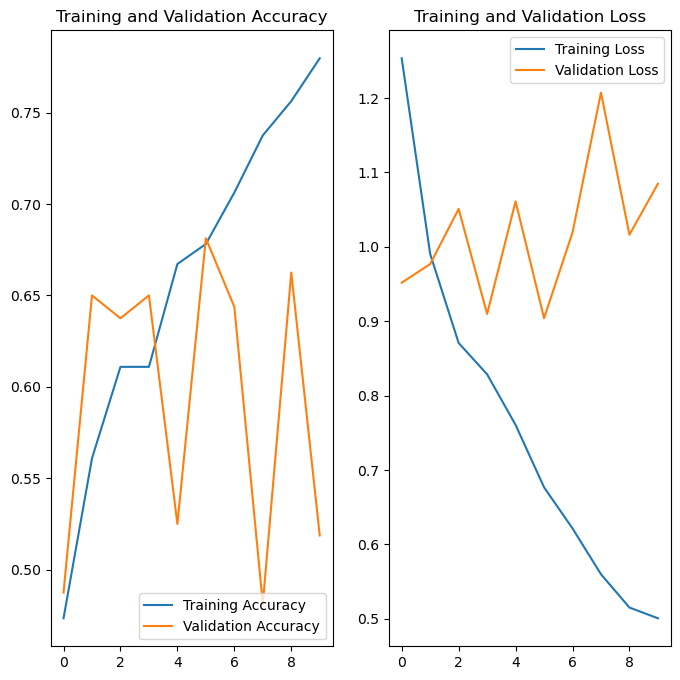

In [10]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [11]:
test_folder = "/Users/rohitjadhav/Desktop/Personal/nsfw-image-detection/test_imgs"

image_paths = [os.path.join(test_folder, file) for file in os.listdir(test_folder)]

images = [tf.keras.utils.load_img(image, target_size=(img_width, img_height)) for image in image_paths]

img_arrays = [tf.keras.utils.img_to_array(image) for image in images]

img_tensor = tf.concat([tf.expand_dims(img, 0) for img in img_arrays], axis=0)

predictions = model.predict(img_tensor)

class_probabilities = tf.nn.softmax(predictions, axis=1).numpy()

predicted_labels = np.argmax(class_probabilities, axis=1)

for i, image_path in enumerate(image_paths):
    class_name = class_names[predicted_labels[i]]
    confidence = 100 * np.max(class_probabilities[i])
    print("Image: {}, Predicted Class: {}, Confidence: {:.2f}%".format(image_path, class_name, confidence))


1/1 [==============================] - 0s 54ms/step
Image: /Users/rohitjadhav/Desktop/Personal/nsfw-image-detection/test_imgs/test2.webp, Predicted Class: neutral, Confidence: 96.77%
Image: /Users/rohitjadhav/Desktop/Personal/nsfw-image-detection/test_imgs/test1.jpeg, Predicted Class: neutral, Confidence: 99.97%


In [12]:
model.save('../models/nsfw_model.h5')